In [3]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.base import clone
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
model = pickle.load(open('random_forest_completion_first_half.p', 'rb')) # load the model

In [3]:
# model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=20, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

In [1]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)

def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D

    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def print_roc_curve(y_test, probabilities):
    '''
    Calculates and prints a ROC curve given a set of test classes and probabilities from a trained classifier
    '''
    tprs, fprs, thresh = roc_curve(y_test, probabilities)
    plt.figure(figsize=(12,10))
    plt.plot(fprs, tprs, 
         label='Logistic Regression', 
         color='red')
    plt.plot([0,1],[0,1], 'k:')
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve AUC: {} Recall: {}".format(roc_auc, recall))
    plt.show()

In [2]:
# X_train = pd.read_csv('../data/processed/first_half/X_train.csv')
# y_train = pd.read_csv('../data/processed/first_half/y_train.csv')
# y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/first_half/X_test.csv')

y_test = pd.read_csv('../data/processed/first_half/y_test.csv')
y_test = y_test['module_not_completed']

# fill
# X_train.fillna(value = 0, inplace = True)
# X_train = scale_subset(X_train, numeric_cols)
X_test.fillna(value = 0, inplace = True)

NameError: name 'pd' is not defined

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
predictions = model.predict(X_test)

In [8]:
recall = recall_score(y_test, predictions)
recall

0.8515925796289815

In [9]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.8805845763202288

In [10]:
probas = model.predict_proba(X_test)[:, :1]
tprs, fprs, thresh = roc_curve(y_test, probas)

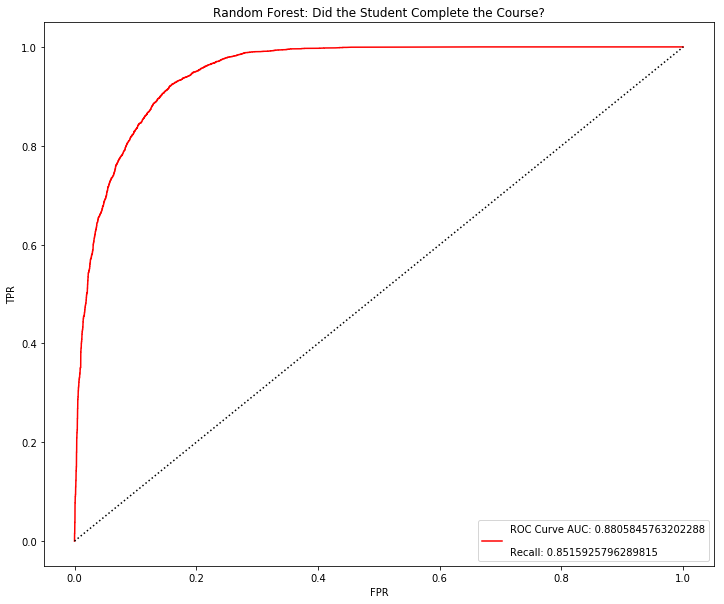

In [11]:
plt.figure(figsize=(12,10))
plt.plot(fprs, tprs, 
    label='ROC Curve AUC: {}\n\nRecall: {}'.format(roc_auc, recall),
    color='red')
plt.plot([0,1],[0,1], 'k:')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Random Forest: Did the Student Complete the Course?")
plt.show()

In [12]:
# print(confusion_matrix(y_test, predictions))
print('Random Forest With Feature Engineering')
print(classification_report(y_test, predictions))

Random Forest With Feature Engineering
              precision    recall  f1-score   support

       False       0.84      0.91      0.88      5054
        True       0.91      0.85      0.88      5714

   micro avg       0.88      0.88      0.88     10768
   macro avg       0.88      0.88      0.88     10768
weighted avg       0.88      0.88      0.88     10768



In [13]:
# pd.DataFrame(data={'frps': fprs, 'tprs': tprs, 'Thresholds': thresh})

# Which features are most important?

In [21]:
feat_imp = importances(model, X_test, y_test)

array([0.00662483, 0.01493414, 0.15714056, 0.16778441, 0.06177576,
       0.03823857, 0.14086826, 0.06759585, 0.10100126, 0.08287014,
       0.00938978, 0.00314206, 0.00647205, 0.00293197, 0.02013809,
       0.00492391, 0.        , 0.00507117, 0.00451727, 0.00682904,
       0.        , 0.00672921, 0.        , 0.00306228, 0.00213572,
       0.00329825, 0.0022648 , 0.00325078, 0.00358978, 0.00254556,
       0.00304334, 0.00298966, 0.00293639, 0.00348366, 0.00236853,
       0.        , 0.00376027, 0.00894026, 0.00085198, 0.00054103,
       0.        , 0.00392235, 0.00363183, 0.00353017, 0.00320499,
       0.00333957, 0.00340198, 0.00334769, 0.0030487 , 0.00294285,
       0.00172866, 0.00600545, 0.00037614, 0.        , 0.00347898,
       0.        ])

In [22]:
features = list(X_test.columns)

In [23]:
coef_dict = c.OrderedDict((zip(feat_imp.values, features)))

In [24]:
sorted(coef_dict.items(), reverse=True)[:10]

[(0.16778441085985057, 'pct_days_vle_accessed'),
 (0.15714056123093406, 'clicks_per_day'),
 (0.14086825629200606, 'avg_score'),
 (0.10100126129016708, 'days_early_first_assessment'),
 (0.0828701415096745, 'score_first_assessment'),
 (0.06759585075604124, 'avg_days_sub_early'),
 (0.06177575773304063, 'max_clicks_one_day'),
 (0.038238567031901455, 'first_date_vle_accessed'),
 (0.020138091524588245, 'code_module_FFF'),
 (0.014934144185697997, 'studied_credits')]

In [ ]:
pickle.dump(model, open('random_forest_completion_first_half.p', 'wb')) # save the model